# Lecture 1
## Esercizio 01.1


Un test utile allo scopo di verificare il corretto funzionamento del generatore di numeri casuali consiste nella valutazione del valor medio di numeri estratti uniformemente nell'intervallo $[0,1)$. 
Il valore di aspettazione è pari al risultato del noto integrale $$\langle r \rangle = \int_0^1 r dr=\frac{1}{2}$$

Per il calcolo del valor medio e della sua incertezza valutiamo l'integrale $M=10000$ volte con numeri estratti uniformemente tra $0$ e $1$, suddivisi in $N=100$ blocchi da $L=100$ stime ciascuno, servendoci del metodo a blocchi per valutare l'incertezza del risultato.

A seguire il plot della stima del valore medio in funzione del numero di lanci eseguiti, con la corrispondente incertezza.


Last block estimate: 0.501214 , error: 0.00306686


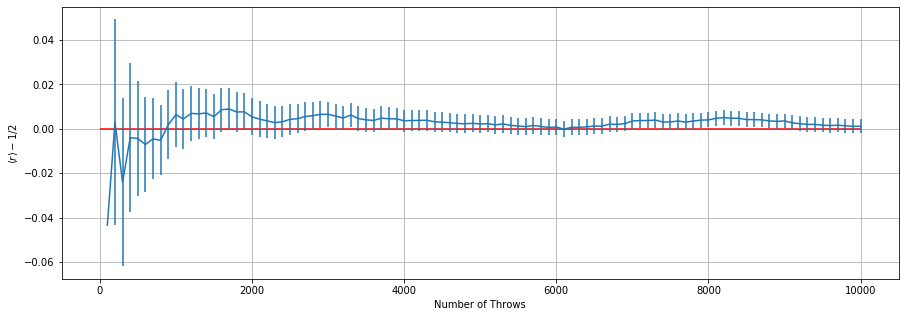

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, y, error = np.loadtxt( "data_mean.out", usecols=(0,1,2), delimiter=' ', unpack='true' )
plt.figure(0,figsize=(15,5))
plt.hlines(0,0,1E4, color='red')
plt.errorbar(x,y-0.5,yerr=error)
plt.xlabel('Number of Throws')
plt.ylabel(r"$\langle r \rangle-1/2$")
plt.grid(True)

print("Last block estimate:",y[-1],", error:",error[-1])

plt.show()

Notiamo che sull'asse delle ordinate sono stati riportati i valori medi di r traslati di $-\frac{1}{2}$ in modo che la convergenza sia a $0$ invece che al valore atteso $\frac{1}{2}$. Il valor medio dei numeri estratti dal generatore è effettivamente $\frac{1}{2}$.

Dunque la differenza tra il valore dell'integrale calcolato con metodo Monte Carlo e il valore noto teorico tende a 0 quanto più il numero di lanci effettuati aumenta. Di qui si evince l'efficienza del metodo MC.


Per quanto riguarda la varianza, avendo prima appurato che il valor medio è $\frac{1}{2}$, il valore atteso è $$\sigma^2=\int_0^1 \left(r-\langle r \rangle \right)^2dr=\int_0^1 \left(r-\frac{1}{2}\right)^2dr=\frac{1}{12}$$ 
Per la stima della varianza dei numeri casuali estratti dal generatore, dobbiamo dunque calcolare $$\langle \left(r-\frac{1}{2}\right)^2 \rangle$$

Come in precedenza, si considerano $M=10000$ estrazioni suddivise in $100$ blocchi.


Last block estimate: 0.0832638 , error: 0.000788592


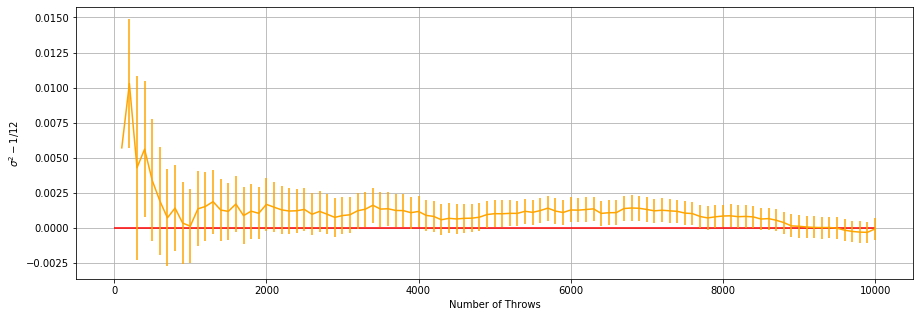

In [4]:
x, y, error = np.loadtxt( "data_var.out", usecols=(0,1,2), delimiter=' ', unpack='true' )
plt.figure(0,figsize=(15,5))
plt.hlines(0,0,1E4, color='red')
plt.errorbar(x,y-1/12,yerr=error, color='orange')
plt.xlabel('Number of Throws')
plt.ylabel(r"$\sigma^2 - 1/12$")
plt.grid(True)

print("Last block estimate:",y[-1],", error:",error[-1])

plt.show()

Anche in questo caso notiamo come la differenza tra il valore MC della deviazione standard calcolato  $\sigma^2 = \int_0^1 (r-1/2)^2 dr$.e quello atteso di $\frac{1}{12}$ converga a 0 per un numero crescente di lanci.

Per verificare che i numeri estratti siano effettivamente uniformi, stimiamo la probabilità che la distribuzione da cui essi sono estratti non sia uniforme e, qualora questa risulti molto bassa, escludiamo tale ipotesi.

Per fare questo utilizziamo il test $\chi^2$: esso rappresenta il rapporto tra la differenza quadratica tra il numero di eventi effettivamente osservato $O_i$ e quello atteso $E_i$, e la varianza $\sigma^2=E_i$:

$$\chi^2=\sum_i \frac{(O_i-E_i)^2}{E_i}$$

Per implementare il test $\chi^2$ dividiamo l'intervallo $[0,1]$ in $M=100$ sottointervalli identici. Il numero atteso di eventi (volte in cui il numero casuale uniforme estratto cade nell'i-esimo sottointervallo) dopo $n$ estrazioni è $np = n\times 1/M= n/M = E_i$ ed è uguale per tutti i sottointervalli. 
Il numero di eventi osservati $n_i\equiv O_i$ corrisponde invece al numero di numeri effettivamente estratti nell'intervallo i-esimo. 
Poichè ci aspettiamo che in media $(n_i - n/M)^2 \simeq n/M$, allora indicativamente $\chi^2 \simeq 100$, ossia il numero di sottointervalli; valori più alti potrebbero indicare che la distribuzione non è uniforme. 
Calcoliamo $\chi^2$ $100$ volte utilizzando blocchi di $n=10000$ numeri casuali successivi.

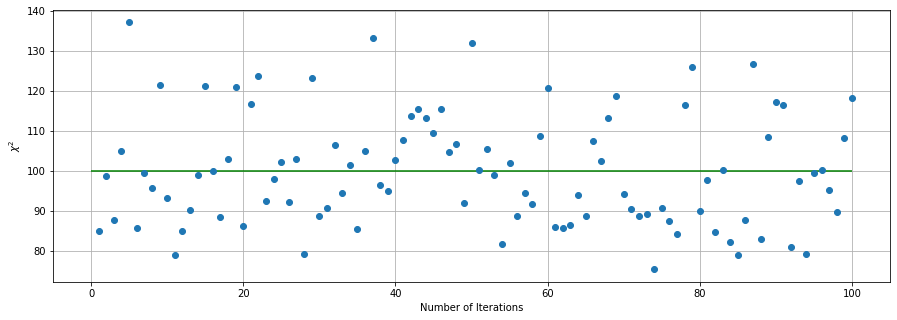

In [5]:
x,y = np.loadtxt( "data_chi2.out", usecols=(0,1), delimiter=' ', unpack='true' )
plt.figure(0,figsize=(15,5))
plt.hlines(100,0,100, color='green')
plt.plot(x,y, "o")
plt.xlabel('Number of Iterations')
plt.ylabel('$\chi^2$')
plt.grid(True)

plt.show()

Come vediamo, il $\chi^2$ varia attorno al valore $M=100$ sottointervalli.

## Esercizio 01.2

Vogliamo ora verificare il Teorema del Limite Centrale.

Estendiamo il nostro generatore in modo tale che possa generare un numero da diverse distribuzioni:
1. Distribuzione di probabilità uniforme -> Dado Standard a 6 facce (per semplicità considero il caso continuo)
2. Distribuzione esponenziale $p(x) = \lambda \exp(-\lambda x)$, $x\in [0;+\infty]$ (qui $\lambda=1$) -> Dado Esponenziale
3. Distribuzione di Cauchy-Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$, $x\in [-\infty;+\infty]$ (qui $\mu=0$, $\Gamma=1$) -> Dado Lorentziano

Per ognuna di queste distribuzioni di probabilità si è considerata la convergenza  $$S_N=\frac{1}{N}\sum_{i=1}^N x_i$$ dove $x_i$ è una variabile aleatoria con una delle distribuzioni di probabilità sopra elencate, e si sono riempiti degli istogrammi ognuno con $10^4$ valori di $S_N$ (per $N=1, 2, 10, 100$)

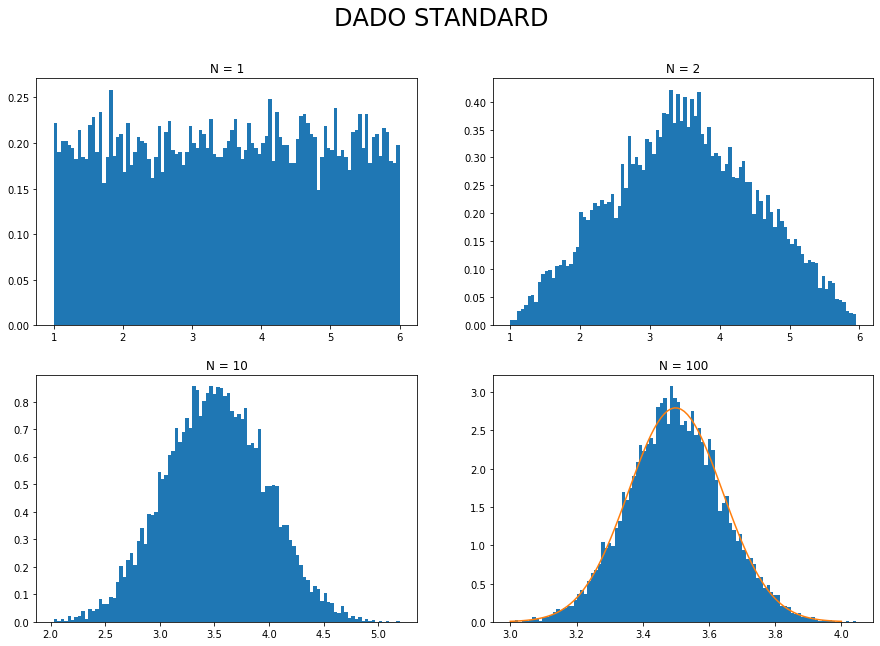

Optimized parameters for N=100:
Mu:  3.499153013 Sigma: 0.14275325529140073


In [6]:
from scipy.stats import norm

x1=np.loadtxt("data_unif.out", skiprows=0, max_rows=10000, unpack=True)
x2=np.loadtxt("data_unif.out", skiprows=10000, max_rows=10000)
x10=np.loadtxt("data_unif.out", skiprows=20000, max_rows=10000)
x100=np.loadtxt("data_unif.out", skiprows=30000, max_rows=10000)

fig=plt.figure(figsize=(15,10))
fig.suptitle('DADO STANDARD', fontsize=24)

plt.subplot(221)
plt.hist(x1, 100, density=True)
plt.title('N = 1')

plt.subplot(222)
plt.hist(x2, 100, density=True)
plt.title('N = 2')

plt.subplot(223)
plt.hist(x10, 100, density=True)
plt.title('N = 10')

plt.subplot(224)
plt.hist(x100, 100, density=True)
plt.title('N = 100')

parameter = norm.fit(x100)
x = np.linspace(3,4,100)
y = norm.pdf(x, *parameter)
plt.plot(x,y)

plt.show()

print('Optimized parameters for N=100:')
print('Mu: ', parameter[0], 'Sigma:', parameter[1])
plt.show()

Sappiamo dai calcoli che 
$$\mu=\dfrac{1}{5}\int_1^6x\,dx=\dfrac{7}{2}=3.5$$
$$N\sigma^2_N=\dfrac{1}{5}\int_1^6\bigl(x-\mu\bigr)^2\,dx=\dfrac{25}{12}$$

Ci aspettiamo quindi che la distribuzione di probabilità di $S_N$ converga a una gaussiana con $\mu=\langle x_i \rangle = 3.5$ e varianza $\sigma^2=\frac{\sigma^2_{x_i}}{N}$, che nel caso $N=100$ diventa $\sigma_{100}=\frac{1}{4\sqrt{3}}\approx 0.144 $.

La distribuzione di probabilità di $S_N$ converge effettivamente a una gaussiana. Inoltre, facendo un fit gaussiano per l'istogramma con $N=100$ si ottengono valori di $\mu$ e $\sigma$ compatibili con quelli trovati mediante teorema del limite centrale.


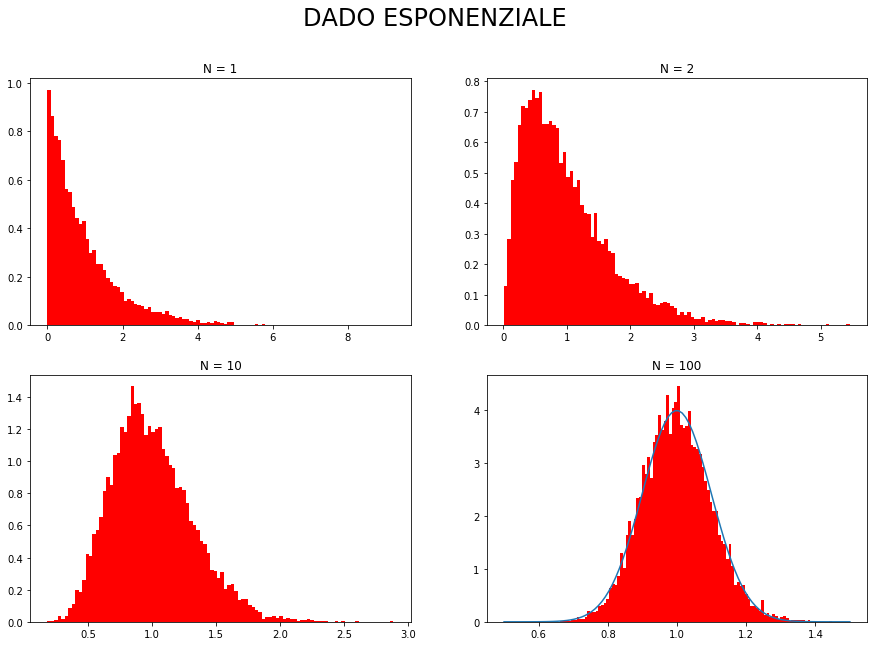

Optimized parameters for N=100:
Mu:  0.9994180188 Sigma: 0.09998641289439604


In [7]:
x1=np.loadtxt("data_exp.out", skiprows=0, max_rows=10000, unpack=True)
x2=np.loadtxt("data_exp.out", skiprows=10000, max_rows=10000)
x10=np.loadtxt("data_exp.out", skiprows=20000, max_rows=10000)
x100=np.loadtxt("data_exp.out", skiprows=30000, max_rows=10000)

fig=plt.figure(figsize=(15,10))
fig.suptitle('DADO ESPONENZIALE', fontsize=24)

plt.subplot(221)
plt.hist(x1, 100, density=True, color='red')
plt.title('N = 1')
plt.subplot(222)
plt.hist(x2, 100, density=True, color='red')
plt.title('N = 2')
plt.subplot(223)
plt.hist(x10, 100, density=True, color='red')
plt.title('N = 10')
plt.subplot(224)
plt.hist(x100, 100, density=True, color='red')
plt.title('N = 100')

parameter = norm.fit(x100)
x = np.linspace(0.5,1.5,100)
y = norm.pdf(x, *parameter)
plt.plot(x,y)

plt.show()

print('Optimized parameters for N=100:')
print('Mu: ', parameter[0], 'Sigma:', parameter[1])
plt.show()

La distribuzione esponenziale $$p(x)=\lambda e^{-\lambda x}$$ ha valore di aspettazione $\langle x_i \rangle=\frac{1}{\lambda}$ e varianza pari a $\sigma^2_{x_i}=\frac{1}{\lambda^2}$. La distribuzione limite $S_N$ deve convergere a una gaussiana con $\mu=\langle x_i \rangle =\frac{1}{\lambda}$ e varianza $\sigma^2 = \frac{1}{\lambda^2 N}$, quindi $\sigma=\frac{1}{\lambda \sqrt{N}}$. Qui $\lambda=1$, dunque per $N=100$, si attende $\mu\approx1$ e $\sigma_{100}\approx0.1$.

La distribuzione di probabilità di $S_N$ converge effettivamente a una gaussiana. Inoltre, facendo un fit gaussiano per l'istogramma con $N=100$ si ottengono dei valori di $\mu$ e $\sigma$ compatibili con quelli trovati mediante teorema del limite centrale.

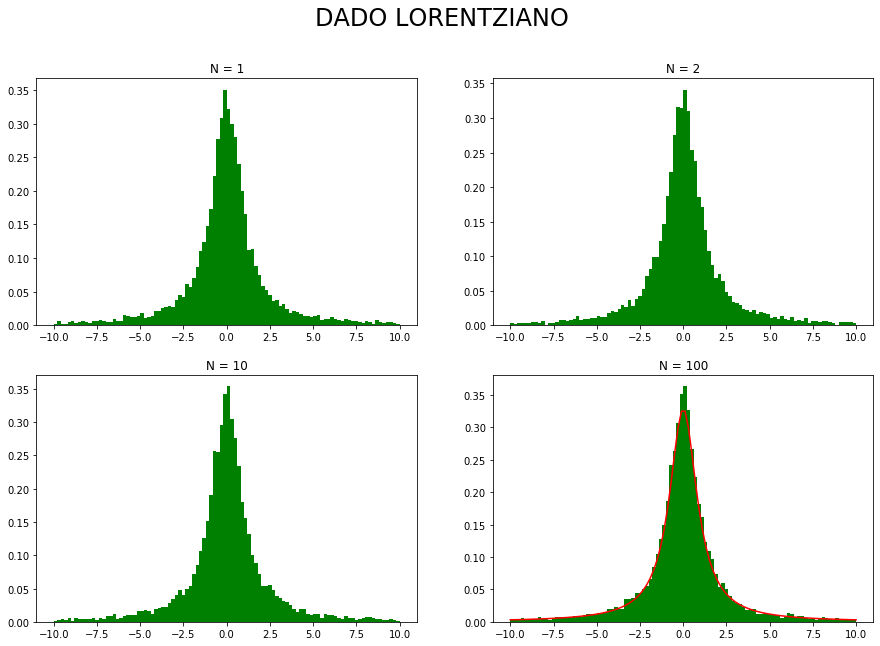

Optimized parameters for N=100:
Mu:  0.0017144926439186452 Gamma: 0.9685078357539605


In [8]:
from scipy.stats import cauchy

x1=np.loadtxt("data_lorentz.out", skiprows=0, max_rows=10000, unpack=True)
x2=np.loadtxt("data_lorentz.out", skiprows=10000, max_rows=10000)
x10=np.loadtxt("data_lorentz.out", skiprows=20000, max_rows=10000)
x100=np.loadtxt("data_lorentz.out", skiprows=30000, max_rows=10000)

fig=plt.figure(figsize=(15,10))
fig.suptitle('DADO LORENTZIANO', fontsize=24)

plt.subplot(221)
plt.hist(x1, 100, range=(-10,10), density=True, color='green')
plt.title('N = 1')
plt.subplot(222)
plt.hist(x2, 100, range=(-10,10), density=True, color='green')
plt.title('N = 2')
plt.subplot(223)
plt.hist(x10, 100, range=(-10,10), density=True, color='green')
plt.title('N = 10')
plt.subplot(224)
plt.hist(x100, 100, range=(-10,10), density=True, color='green')
plt.title('N = 100')

parameter = cauchy.fit(x100)
x = np.linspace(-10,10,100)
y = cauchy.pdf(x, *parameter)
plt.plot(x,y,color='red')

plt.show()

print('Optimized parameters for N=100:')
print('Mu: ', parameter[0], 'Gamma:', parameter[1])

La distribuzione di Cauchy-Lorentz
$$p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$$
ha varianza infinita e non soddisfa pertanto le ipotesi del teorema del limite centrale. Non converge quindi ad una gaussiana, bensì la distribuzione limite è esattamente la distribuzione iniziale. Si nota infatti che non ci sono grandi differenze al variare di N. Nell'ultimo riquadro abbiamo un fit per $N=100$ con una curva di Cauchy-Lorentz, che fornisce valori per i parametri $\mu$ e $\sigma$ compatibili con quelli attesi.

## Esercizio 01.3

Ci proponiamo ora di dare una stima di $\pi$ tramite la realizzazione dell'esperimento di Buffon.
Scegliamo come lunghezza dell'ago $L=3$ e come distanza tra le righe $d=5$.
Eseguiamo l'esperimento $100000$ volte, ottenendo $100$ blocchi da $1000$ stime ciascuno.
La stima di $\pi$ si ottiene dal fatto che la probabilità che l'ago lanciato intercetti una delle linee è $P = 2L/\pi d$; se lanciamo l'ago un numero $N_{thr}$ di volte, e lo vediamo cadere su una  linea un numero $N_{hit}$ di volte, avremo che 

$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$.

Ritengo opportuno notare che, al fine di portare a termine l'esperimento, è necessario definire randomicamente la posizione del centro dell'ago lanciato nell'intervallo $[0,d]$ e la sua inclinazione in $[0,\pi]$, possibilmente senza usare $\pi$ (in quanto la sua stima risulta lo scopo dell'esperimento stesso). Per fare ciò, si è scelto di non estrarre l'angolo di inclinazione uniformemente tra 0 e $\pi$, bensì di estrarre uniformemente una coppia di valori $(x,y)$ rispettivamente dagli intervalli $[-1,1]$ e $[0,1]$. In seguito, la coppia di valori viene rigettata a favore di una nuova se $r^2=x^2+y^2\geq1$, altrimenti viene accettata ed usata per definire un punto randomico $(x,y)$ in un semicerchio, nella forma $(r\cos\theta, r\sin\theta)$. Possiamo di qui trovare il valore di $\theta$ desiderato uniformemente distribuito in $[0,\pi]$ a partire dalla formula inversa $\theta=\arccos(x/r)$.


Last block estimate: 3.1418 , error: 0.0126083


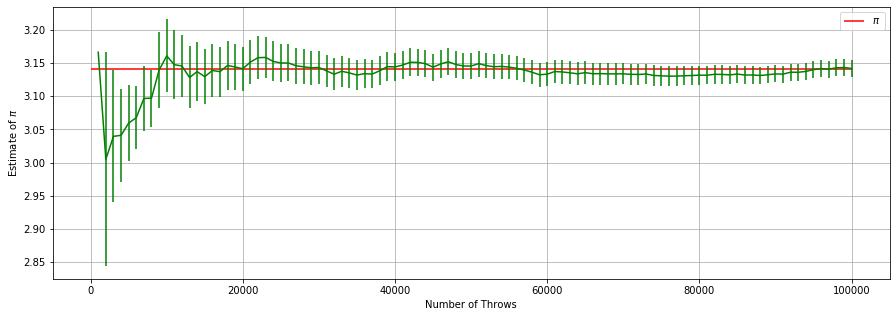

In [9]:
x, y, error = np.loadtxt( "data_buffon.out", usecols=(0,1,2), delimiter=' ', unpack='true' )

plt.figure(figsize=(15,5))
plt.hlines(np.pi,0,1E5,color='red',label="$\pi$")
plt.errorbar(x,y,yerr=error, color='green')
plt.xlabel('Number of Throws')
plt.ylabel('Estimate of $\pi$')
plt.grid(True)
plt.legend()

print("Last block estimate:",y[-1],", error:",error[-1])

plt.show()

Come mostrato dal grafico, al crescere dei lanci si ha convergenza verso il valore universalmente noto di $\pi$.